# Car Data Analysis

## Introduction
This analysis aims to explore and gain insights from a dataset containing information about various vehicles, including their specifications, prices, and origins. By applying statistical and visual analysis techniques using Python and Pandas, we aim to understand the relationships between different attributes and how they impact vehicle prices. In this analysis, we explore a dataset containing various features of cars, including their make, model, type, origin, and drivetrain. The dataset comprises columns such as MSRP (Manufacturer's Suggested Retail Price), Invoice price, engine specifications like size and cylinders, and performance metrics such as Horsepower, MPG (Miles Per Gallon) for both city and highway, as well as physical attributes like Weight, Wheelbase, and Length.

# Data Importation and Initial Exploration
The dataset was imported using the Pandas library, allowing us to leverage its powerful data manipulation capabilities. We performed an initial exploration of the data by checking the data types of each column, identifying missing values, and gaining insights into the distribution of car types and their respective prices. This foundational analysis sets the stage for deeper insights into car performance and market trends.

## Importing Libraries
We start by importing the necessary libraries for data analysis and visualization: Matplotlib, Pandas, Seaborn, and NumPy.

In [30]:
import pandas as pd

In [77]:
import seaborn as sns

In [79]:
import numpy as np


In [81]:
import matplotlib.pyplot as plt

## Loading the Dataset
We load the car dataset from a CSV file using Pandas and display the first few rows to understand its structure.

In [36]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Python Data Analysis\Cars Dataset.csv')

In [153]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## Checking Data Types
Next, we print the data types of each column.

In [155]:
print(df.dtypes)

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object


## Checking the Missing Values
Next, we print any missing values in the dataset.

In [157]:
print(df.isnull().sum())

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64


## Converting Currency Columns to Numeric
We convert the MSRP and Invoice columns from string format (with dollar signs and commas) to numeric values, coercing any errors into NaN.

In [38]:
df['MSRP'] = pd.to_numeric(df['MSRP'].str.replace(',', '').str.replace('$', ''), errors='coerce')

In [161]:
df['Invoice'] = pd.to_numeric(df['Invoice'].str.replace(',', '').str.replace('$', ''), errors='coerce')

## Verifying Data Types After Conversion
We print the data types again to confirm the changes made to the MSRP and Invoice columns.

In [40]:
print(df.dtypes)

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP           float64
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object


## Filling Missing Values
We define a list of columns to fill missing values with their respective mean values to ensure our dataset is complete for analysis.

In [167]:
columns_to_fill = ['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']

In [169]:
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

## Dropping Remaining Missing Values
After filling in the missing values, we drop any remaining rows with NaN values to ensure a clean dataset.

In [43]:
df.dropna(inplace=True)

## Counting Unique Values
We count the occurrences of each car type.

In [175]:
print(df['Type'].value_counts())

Type
Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64


## Counting Unique Values
We count the occurrences of each car type and origin in the dataset to gain insights into its composition.

In [52]:
print(df['Origin'].value_counts())

Origin
Asia      156
USA       147
Europe    123
Name: count, dtype: int64


## Calculating Mean MSRP by Origin
We group the data by Origin and calculate the mean MSRP for each group, allowing us to see price differences by origin.

In [179]:
mean_msrp_by_origin = df.groupby('Origin')['MSRP'].mean()
print(mean_msrp_by_origin)

Origin
Asia      24741.322785
Europe    48349.796748
USA       28377.442177
Name: MSRP, dtype: float64


## Counting Cars by Type
We count the number of different makes for each car type to understand the distribution of car types in the dataset.

In [181]:
count_by_type = df.groupby('Type')['Make'].count()
print(count_by_type)

Type
Hybrid      3
SUV        60
Sedan     262
Sports     49
Truck      24
Wagon      30
Name: Make, dtype: int64


## Aggregating Statistics by Origin
We create a summary of statistics for MSRP (mean, min, max) and average Weight grouped by Origin.

In [183]:
agg_stats = df.groupby('Origin').agg({'MSRP': ['mean', 'min', 'max'], 'Weight': 'mean'})
print(agg_stats)

                MSRP                          Weight
                mean      min       max         mean
Origin                                              
Asia    24741.322785  10280.0   89765.0  3319.316456
Europe  48349.796748  16999.0  192465.0  3680.723577
USA     28377.442177  10995.0   81795.0  3769.952381


## Creating a Pivot Table
We create a pivot table to visualize the average MSRP for each car type by origin, replacing NaN values with 0 if desired.

In [207]:
pivot_table = df.pivot_table(values='MSRP', index='Origin', columns='Type', aggfunc='mean')
pivot_table.fillna(0, inplace=True)  # Replace NaN with 0 if desired
print(pivot_table)

Type     Hybrid      SUV         Sedan        Sports      Truck         Wagon
Origin                                                                       
Asia    19920.0  29569.0  22763.968085  32510.647059  20383.625  23143.727273
Europe      0.0  48346.0  42992.051282  71998.695652      0.000  37851.250000
USA         0.0  34589.2  25638.833333  45257.222222  27220.250  22345.714286


## Filtering High MSRP Cars
We filter the dataset to find cars with an MSRP greater than 30,000, allowing us to focus on higher-end vehicles.

In [187]:
high_msrp = df[df['MSRP'] > 30000]
print(high_msrp)


      Make                    Model    Type  Origin DriveTrain     MSRP  \
0    Acura                      MDX     SUV    Asia        All  36945.0   
3    Acura                   TL 4dr   Sedan    Asia      Front  33195.0   
4    Acura               3.5 RL 4dr   Sedan    Asia      Front  43755.0   
5    Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  46100.0   
6    Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  89765.0   
..     ...                      ...     ...     ...        ...      ...   
426  Volvo             S80 2.5T 4dr   Sedan  Europe        All  37885.0   
427  Volvo  C70 LPT convertible 2dr   Sedan  Europe      Front  40565.0   
428  Volvo  C70 HPT convertible 2dr   Sedan  Europe      Front  42565.0   
429  Volvo               S80 T6 4dr   Sedan  Europe      Front  45210.0   
431  Volvo                     XC70   Wagon  Europe        All  35145.0   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    33337.0         3.5 

## Filtering Cars by Origin
We filter the dataset to create a new DataFrame, **Asia_cars**, containing only the cars that originate from Asia. This allows us to analyze the characteristics and statistics specific to Asian-made cars.

In [189]:
Asia_cars = df[df['Origin'] == 'Asia']
print(Asia_cars)

       Make                       Model    Type Origin DriveTrain     MSRP  \
0     Acura                         MDX     SUV   Asia        All  36945.0   
1     Acura              RSX Type S 2dr   Sedan   Asia      Front  23820.0   
2     Acura                     TSX 4dr   Sedan   Asia      Front  26990.0   
3     Acura                      TL 4dr   Sedan   Asia      Front  33195.0   
4     Acura                  3.5 RL 4dr   Sedan   Asia      Front  43755.0   
..      ...                         ...     ...    ...        ...      ...   
400  Toyota  MR2 Spyder convertible 2dr  Sports   Asia       Rear  25130.0   
401  Toyota                      Tacoma   Truck   Asia       Rear  12800.0   
402  Toyota       Tundra Regular Cab V6   Truck   Asia       Rear  16495.0   
403  Toyota    Tundra Access Cab V6 SR5   Truck   Asia        All  25935.0   
404  Toyota                   Matrix XR   Wagon   Asia      Front  16695.0   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_

## Sorting Data by MSRP
We sort the DataFrame in descending order based on the MSRP to identify the most expensive cars in the dataset.

In [191]:
sorted_df = df.sort_values(by='MSRP', ascending=False)
print(sorted_df.head())

              Make                  Model    Type  Origin DriveTrain  \
338        Porsche            911 GT2 2dr  Sports  Europe       Rear   
266  Mercedes-Benz              CL600 2dr   Sedan  Europe       Rear   
275  Mercedes-Benz  SL600 convertible 2dr  Sports  Europe       Rear   
274  Mercedes-Benz           SL55 AMG 2dr  Sports  Europe       Rear   
265  Mercedes-Benz              CL500 2dr   Sedan  Europe       Rear   

         MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
338  192465.0  173560.0         3.6        6.0       477.0      17.0   
266  128420.0  119600.0         5.5       12.0       493.0      13.0   
275  126670.0  117854.0         5.5       12.0       493.0      13.0   
274  121770.0  113388.0         5.5        8.0       493.0      14.0   
265   94820.0   88324.0         5.0        8.0       302.0      16.0   

     MPG_Highway  Weight  Wheelbase  Length  
338         24.0  3131.0       93.0   175.0  
266         19.0  4473.0      114.0   196.

## Calculating Average MPG
We calculate the average MPG for each car by averaging the MPG_City and MPG_Highway columns and creating a new column MPG_Average.

In [65]:
df['MPG_Average'] = (df['MPG_City'] + df['MPG_Highway']) / 2

In [67]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG_Average
0,Acura,MDX,SUV,Asia,All,36945.0,"$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,"$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,"$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,"$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,"$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0


## Calculating MSRP to Invoice Ratio
We create a new column MSRP_Invoice_Ratio that represents the ratio of MSRP to Invoice, providing insight into pricing strategy.

In [195]:
df['MSRP_Invoice_Ratio'] = df['MSRP'] / df['Invoice']

In [197]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG_Average,MSRP_Invoice_Ratio
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,20.0,1.108228
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,27.5,1.094619
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,25.5,1.095062
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,24.0,1.095581
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,21.0,1.121520


## Bar Chart:

Purpose: To compare the average MSRP for different Types of cars.

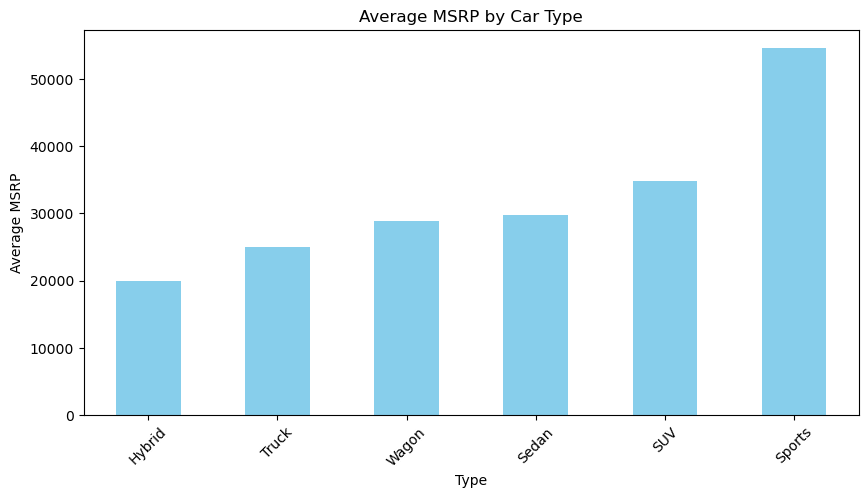

In [85]:
plt.figure(figsize=(10, 5))
mean_msrp_by_type = df.groupby('Type')['MSRP'].mean().sort_values()
mean_msrp_by_type.plot(kind='bar', color='skyblue')
plt.title('Average MSRP by Car Type')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)
plt.show()


## Scatter Plot:

Purpose: To analyze the relationship between Horsepower and MSRP.

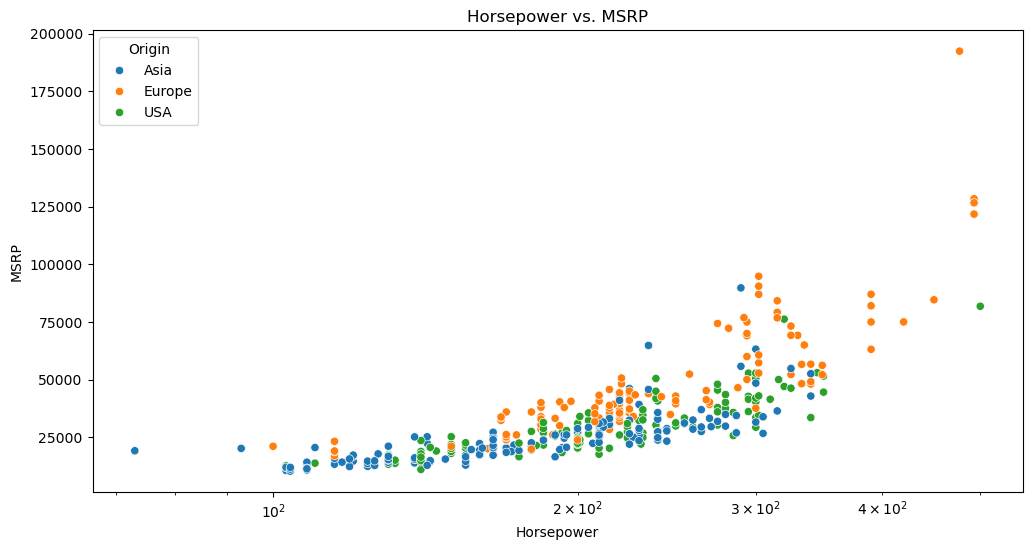

In [88]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Horsepower', y='MSRP', data=df, hue='Origin')
plt.title('Horsepower vs. MSRP')
plt.xlabel('Horsepower')
plt.ylabel('MSRP')
plt.xscale('log')  # Log scale for better visualization
plt.show()


## Count Plot:

Purpose: To show the count of different Types of cars.

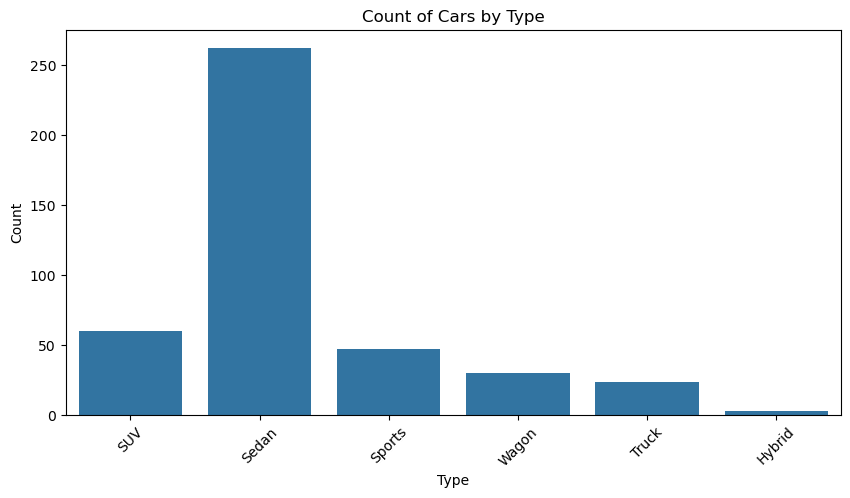

In [94]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Type', data=df)
plt.title('Count of Cars by Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
